# Producing figures with multi-channel images

The ```microplot``` module contains tools to create figures containing multi-channel images. It offers basic tools to turn 2D images into RGB images using specific color maps, combine multiple channels, create figures, adding labels and scale bars.

In [1]:
#%load_ext autoreload
#%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import skimage.io

from microfilm import microplot

## Basic plotting with ```microshow```

The ```microshow``` function should be seen as an "enhanced" version of the Matplotlib ```imshow``` function which specifically deals with representing multi-channel images. In this first section, we see how to use that function and apply basic customizations.

### Load images

The ```microshow``` can take as input a Numpy array or a list of images (more on input format in the [Image inputs](#Image-inputs) section). Here we load a multi-dimensional image as a Numpy array, and also extract each channel as an individual stack: 

In [3]:
image = skimage.io.imread('../demodata/coli_nucl_ori_ter.tif')
image.shape

(3, 30, 220, 169)

This image has 30 time points and 3 channels. We take now just the time ```t=10```:

In [4]:
multi_channel = image[:,10]
multi_channel.shape

(3, 220, 169)

We also isolate each channel:

In [5]:
image1 = multi_channel[0]
image2 = multi_channel[1]
image3 = multi_channel[2]

In [6]:
print(f'image shape: {image1.shape}')
print(f'image type: {image1.dtype}')

image shape: (220, 169)
image type: uint16


### Creating a default plot

We can use the ```microshow``` function to plot our multi-channel image. If no options are passed, by default the image will be represented using the RGB color scheme:

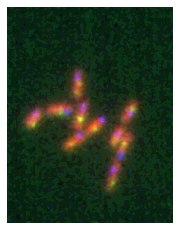

In [7]:
microim = microplot.microshow(images=multi_channel)

However we can easily adjust the color maps or lookup tables with the ```cmaps``` option where we can use any Matplotlib colormap or additionally ```pure_red```, ```pure_green```, ```pure_blue``` which provide classic black-to-color color maps:

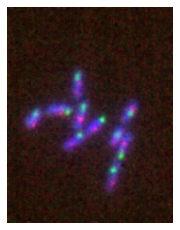

In [8]:
microim = microplot.microshow(images=multi_channel, cmaps=['pure_blue', 'pure_red', 'pure_green'])

### Image inputs

As shown above, we can use a simple Numpy array as input. The dimension ordering is expected to be ```CTXY``` i.e. ```Channel/Time/X/Y```. You can use ```np.swapaxis``` or ```np.moveaxis``` for example to change the dimensions to match this requirement. If you pass a Numpy array, **all channels** are plotted and therefore you need to provide the corresponding number of color maps (if not using default RG).

Alternatively you can also pass **lists of images**. This is useful if for example you don't want to plot all channels of a Numpy array. For example you could use the following to only plot two out of the three channels:

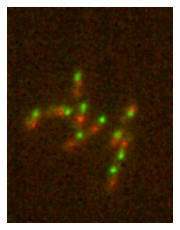

In [9]:
microim = microplot.microshow(images=[multi_channel[1], multi_channel[2]])

### Options at creation

When we create the image, we have a large set of options that we can use to adjust the plot. For example, in addition to selecting specific color maps with ```cmaps```, we can also choose a color projection type, add a scale bar and a label etc.:

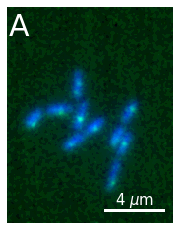

In [10]:
microim = microplot.microshow(images=[image1, image2], cmaps=['pure_blue','pure_green'], proj_type='sum',
                              unit='um', unit_per_pix=0.065, scalebar_units=4,
                              scale_text_centered=True, scale_font_size=15,
                             label_text='A', label_font_size=30);

## Microimage object

When calling ```microshow```, actually a ```Microimage``` instance is returned, which gives access to both specific functions of that instance as well as to the underlying Matplotlib objects.

### Microimage methods

In the examples above, we always passed *all* inputs at time of figure creation. Alternatively to this, one can also *first* create a ```Microimage``` object and *then* use its attached methods such as ```add_label```  and ```add_scalenar``` to modify the plot. This can make the code slightly more readable:

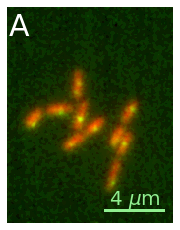

In [11]:
microim = microplot.microshow(images=[image1, image2], cmaps=['pure_red', 'pure_green'])
microim.add_scalebar(unit='um', unit_per_pix=0.065, scalebar_units=4,
                              scale_text_centered=True, scale_color='lightgreen', scale_font_size=20)
microim.add_label(label_text='A', label_font_size=30);

### Relation to Matplotlib

In the same spirit as e.g. the seaborn library, the ```microplot``` module stays very close to Matplotlib, so that you can integrate the image plots into larger figures. There are two ways in which ```microplot``` and Matplotlib are related.

First, the ```Microimage``` object gives access to the ```axis``` of the figure which allows you to use *any* Matplotlib customization on your plot. For example, you can turn the axes back on:

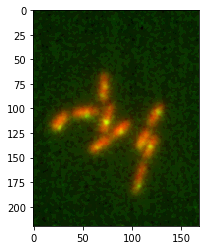

In [12]:
microim = microplot.microshow(images=[image1, image2])
microim.ax.set_axis_on()

Second, you can integrate and ```microplot``` in existing Matplotlib figures again by using the ```axis```. For that you can for example first create a subplot and **re-use** the axis reference as parameter in ```microshow``` to integrate the plot in that figure:

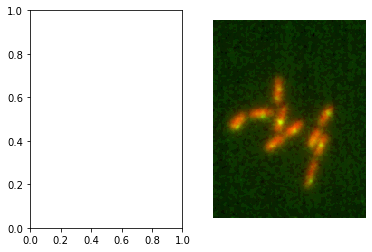

In [13]:
fig, ax = plt.subplots(1,2)
microim = microplot.microshow(images=[image1, image2], ax=ax[1]);

We can then of course use these approaches together. For example, we can first create Matplotlib ```subplots```, add the ```micrplot``` in that figure, and then add labels to each ```microplot```:

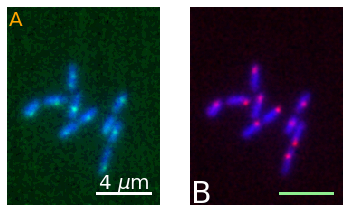

In [14]:
fig, ax = plt.subplots(1,2)
micro1 = microplot.microshow(images=[image1, image2], cmaps=['pure_blue', 'pure_green'],
                              unit_per_pix=0.065, scalebar_units=4, unit='um', 
                    scale_text_centered=True, scale_font_size=20, scale_color='white', ax=ax[0]);
micro2 = microplot.microshow(images=[image1, image3], cmaps=['pure_blue', 'pure_red'],
                              unit_per_pix=0.065, scalebar_units=4, unit='um',
                    scale_font_size=None, scale_color='lightgreen', ax=ax[1]);

micro1.add_label('A', label_location='upper left', label_font_size=20, label_color='orange')
micro2.add_label('B', label_location='lower left', label_font_size=30);

## Lower level functions

When calling ```microshow```, several internal functions are used, e.g. to rescale the image intensity, combined multiple colormaps etc. You also have access to these functions individually.

### Convert image to display with chosen colormap

Using the ```colorify_by_name``` function, you can turn a single 2D array into a RGB image with a certain colormap. You can use any colormap from Matplotlib. Additionally, since Matplotlib doesn't offer plain colormaps from black to a given color (used very often in microcopy), you can also specify one of ```pure_green```, ```pure_red```, ```pure_blue```:

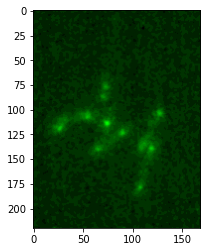

In [15]:
im_green = microplot.colorify_by_name(image2, cmap_name='pure_green', flip_map=False, rescale_type='min_max')
plt.imshow(im_green);

By default the image intensity is rescaled using the min-max values. This is often sub-optimal (e.g. if single pixels are way out of the distribution) and you can specify another rescaling. For example you can explicitly provide lower and upper limits:

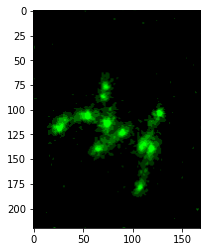

In [16]:
im_green = microplot.colorify_by_name(image2, cmap_name='pure_green', flip_map=False, rescale_type='limits',
                                       limits=[100,105])
plt.imshow(im_green);

### colormap hex

Alternatively to the keyword based map, you can also use a hexadecimal encoding of a color to create an colormap ranging from black to that color. This gives more flexibility:

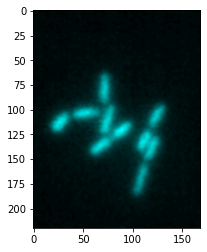

In [17]:
heximage = microplot.colorify_by_hex(image1, cmap_hex='#00ffff')
plt.imshow(heximage);

### Combining images

After having converted images to a given colormap, you can combine them into a single image with overlayed colors. Currently you can use a maximum projection (default) or a sum to replicate the Fiji behavior. You can simply use the ```combine_image``` function for that:

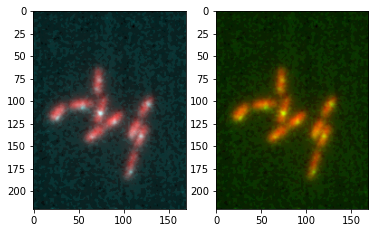

In [18]:
im1_mapped = microplot.colorify_by_name(image1, cmap_name='pure_red')
im2_mapped = microplot.colorify_by_hex(image2, cmap_hex='#00ffff')


im1_mapped_b = microplot.colorify_by_name(image1, cmap_name='pure_red')
im2_mapped_b = microplot.colorify_by_name(image2, cmap_name='pure_green')

combined = microplot.combine_image([im1_mapped, im2_mapped])
combined_b = microplot.combine_image([im1_mapped_b, im2_mapped_b])

fig, ax = plt.subplots(1,2)
ax[0].imshow(combined)
ax[1].imshow(combined_b);

In the plots below, we compare the two available projections, maximum and sum. The difference is mostly visible when using colormaps that have large overlap, e.g. here with ```summer``` and ```cool```. With ```pure_green``` and ```pure_red``` there would for example be no visual difference.

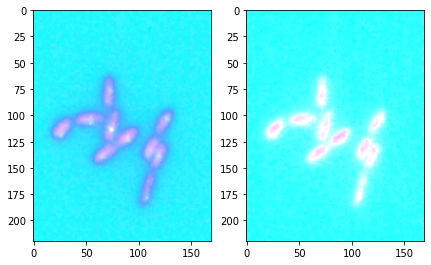

In [19]:
im1_mapped_b = microplot.colorify_by_name(image1, cmap_name='cool')
im2_mapped_b = microplot.colorify_by_name(image2, cmap_name='summer')

combined = microplot.combine_image([im1_mapped_b, im2_mapped_b], proj_type='max')
combined_b = microplot.combine_image([im1_mapped_b, im2_mapped_b], proj_type='sum')

fig, ax = plt.subplots(1,2, figsize=(7,7))
ax[0].imshow(combined)
ax[1].imshow(combined_b);

### Direct conversion

To save some steps you can also directly use a list of images and of colormaps to create a combined image:

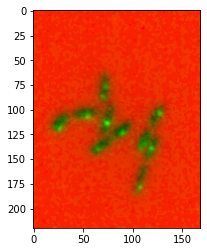

In [20]:
converted = microplot.multichannel_to_rgb(images=[image1, image2], cmaps=['pure_red', 'pure_green'], flip_map=[True, False])
plt.imshow(converted);

Most of these functions also work directly with Numpy arrays:

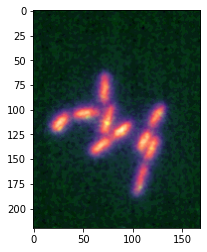

In [21]:
converted = microplot.multichannel_to_rgb(images=[image1, image2], cmaps=['magma', 'pure_green'])
plt.imshow(converted);

## The scalebar

We have seen above, that you could add a scalebar to the image. For that you only need to defined the ```unit``` you use e.g. um, the size per pixel ```unit_per_pixel``` e.g. 0.5um/pixels, and the size of the scale bar ```scalebar_units``` in your unit e.g. 40um:

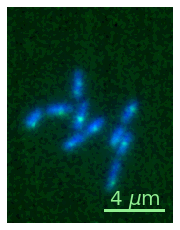

In [22]:
microim = microplot.microshow(images=[image1, image2], cmaps=['pure_blue', 'pure_green'],
                              unit='um', unit_per_pix=0.065, scalebar_units=4,
                              scale_text_centered=True, scale_color='lightgreen', scale_font_size=20);

## Export

As the figure is simply a Matplotlib figure, you can just use the regular ```savefig``` function (and use [this trick](https://stackoverflow.com/a/27227718) to avoid white space around the plot). For a singe image we can access the figure from the axis itself:

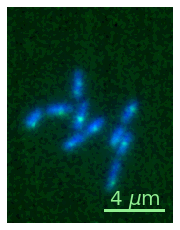

In [23]:
microim = microplot.microshow(images=[image1, image2], cmaps=['pure_blue', 'pure_green'],
                              unit='um', unit_per_pix=0.065, scalebar_units=4,
                              scale_text_centered=True, scale_color='lightgreen', scale_font_size=20);
microim.ax.figure.savefig('single.png', bbox_inches = 'tight', pad_inches = 0, dpi=600)

And for more complex plots, you can just use the regular figure creation:

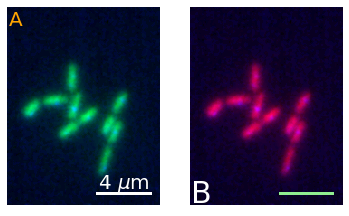

In [24]:
fig, ax = plt.subplots(1,2)
micro1 = microplot.microshow(images=[image1, image2], cmaps=['pure_green', 'pure_blue'],
                              unit_per_pix=0.065, scalebar_units=4, unit='um', 
                    scale_text_centered=True, scale_font_size=20, scale_color='white', ax=ax[0]);
micro2 = microplot.microshow(images=[image1, image2], cmaps=['pure_red', 'pure_blue'],
                              unit_per_pix=0.065, scalebar_units=4, unit='um',
                    scale_font_size=None, scale_color='lightgreen', ax=ax[1]);

micro1.add_label('A', label_location='upper left', label_font_size=20, label_color='orange')
micro2.add_label('B', label_location='lower left', label_font_size=30);

In [25]:
fig.savefig('figure.png', bbox_inches = 'tight', pad_inches = 0, dpi=600)

In [26]:
fig.savefig('figure.pdf', bbox_inches = 'tight', pad_inches = 0, dpi=600)